In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import prf_utils

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
activePointsList = prf_utils.parseATrace("/Users/giuliostramondo/Projects/H2RC16/rodinia_test_100_chess_sparser_1read_2spaces.atrace")

TotalNumberOfAccesses=0
for i in range(0,len(activePointsList)):
    TotalNumberOfAccesses+=len(activePointsList[i])
print "TotalNumberOfAccesses: "+str(TotalNumberOfAccesses)

row_accesses = []
row_efficiency = []
row_speedup = []
row_efficiency_over_accesses = []
for i in range(36):
    row_accesses.append(0)
    row_efficiency.append(0)
    row_speedup.append(0)
    row_efficiency_over_accesses.append(0)
    
for memories in range(1,36):
    TotalParallelAccesses=0
    for i in range(0,len(activePointsList)):
        active_points = list(set(activePointsList[i]))
        #sol = prf_utils.solveOptimally(active_points,2,4, prf_utils.MappingScheme.RECTANGLE_ONLY)
        sol = prf_utils.solveOptimally(active_points,1,memories, [prf_utils.Shape.ROW,prf_utils.Shape.MAIN_DIAGONAL])
        TotalParallelAccesses+=len(sol)
    
    print "TotalNumberOfAccesses: "+str(TotalNumberOfAccesses)
    print "TotalParallelAccesses: "+str(TotalParallelAccesses)+" with "+str(memories)+" memories"
    row_accesses[memories]=TotalParallelAccesses
    row_efficiency[memories]=TotalNumberOfAccesses/float(TotalParallelAccesses*memories)
    row_speedup[memories]=TotalNumberOfAccesses/float(TotalParallelAccesses)
    row_efficiency_over_accesses[memories]=row_efficiency[memories]/float(TotalParallelAccesses)

TotalNumberOfAccesses: 7025
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 7025 with 1 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 4691 with 2 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 3577 with 3 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 2417 with 4 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1911 with 5 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1906 with 6 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1705 with 7 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1702 with 8 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1699 with 9 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1601 with 10 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1599 with 11 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1597 with 12 memories
TotalNumberOfAccesses: 7025
TotalParallelAccesses: 1595 with 13 memories
TotalNumberOfAccesses: 7025
Tota

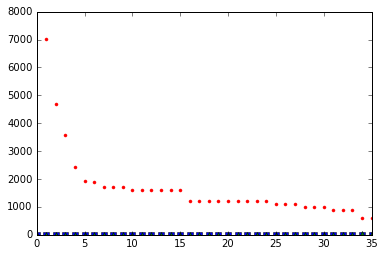

In [3]:
memories = np.arange(0, 36, 1)
plt.plot(memories, row_accesses, 'r.', memories, row_efficiency, 'bs', memories, row_speedup, 'g^')
plt.show()

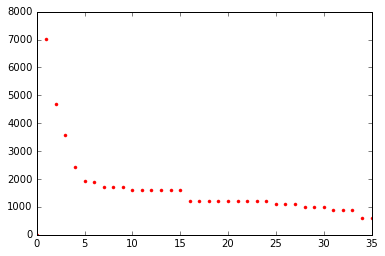

In [4]:
plt.plot(memories, row_accesses, 'r.')

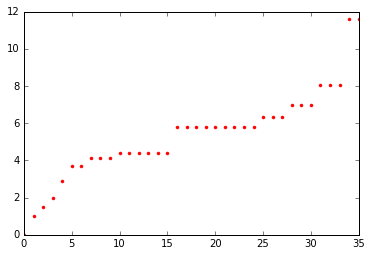

In [5]:
plt.plot(memories, row_speedup, 'r.')

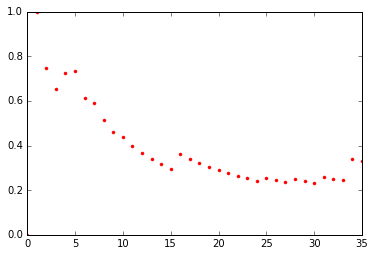

In [6]:
plt.plot(memories, row_efficiency, 'r.')

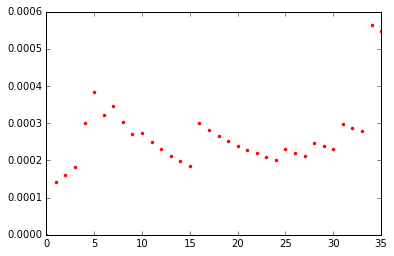

In [7]:
plt.plot(memories, row_efficiency_over_accesses, 'r.')

In [9]:
#Write output to file

f = open("row_diagonal_100_kmeans_sparser_1read_2spaces.csv","w")
for i in range(1,36):
    if i == 35:
        f.write(str(i)+"\n")
    else:
        f.write(str(i)+",")
for i in range(1,36):
    if i == 35:
        f.write(str(row_accesses[i])+"\n")
    else:
        f.write(str(row_accesses[i])+",")
for i in range(1,36):
    if i == 35:
        f.write(str(row_speedup[i])+"\n")
    else:
        f.write(str(row_speedup[i])+",")
for i in range(1,36):
    if i == 35:
        f.write(str(row_efficiency[i])+"\n")
    else:
        f.write(str(row_efficiency[i])+",")
for i in range(1,36):
    if i == 35:
        f.write(str(row_efficiency_over_accesses[i])+"\n")
    else:
        f.write(str(row_efficiency_over_accesses[i])+",")